In [56]:
import numpy as np
import pandas as pd
import re

In [57]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [58]:
df = pd.read_csv('flats_cleaned_v2.csv')

In [59]:
df.duplicated().sum()

1

In [60]:
df = pd.read_csv('flats_cleaned_v2.csv').drop_duplicates()

In [61]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Direction
0,simoco sanhita housing complex,0.27,bhangar,3857.0,Super Built up area 916(85.1 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),3.0,2,1,not available,2,NaN,0 to 1 Year Old,NaN,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Waste Disposal', 'Club house / Community Center']",West


# areaWithType

we will divide into 3 columns


*   Super Built up area
*   Built Up area
*   Carpet area








In [62]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [63]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [64]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [65]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [66]:
df[['price','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,areaWithType,super_built_up_area,built_up_area,carpet_area
471,0.44,Super Built up area 874(81.2 sq.m.),874.0,NaN,NaN
153,0.38,Super Built up area 765(71.07 sq.m.),765.0,NaN,NaN
748,0.51,Super Built up area 1277(118.64 sq.m.),1277.0,NaN,NaN
319,0.27,Built Up area: 914 (84.91 sq.m.),NaN,914.0,NaN
350,0.80,Super Built up area 1500(139.35 sq.m.),1500.0,NaN,NaN


# additionalRoom

In [67]:
df['additionalRoom'].value_counts()

not available                                878
others                                       368
store room                                    53
servant room                                  40
pooja room                                    32
study room                                    20
pooja room,others                              7
pooja room,study room                          6
servant room,store room                        4
pooja room,study room,others                   4
servant room,others                            4
pooja room,store room                          3
pooja room,servant room                        2
study room,servant room                        1
store room,pooja room                          1
pooja room,study room,servant room,others      1
servant room,study room                        1
Name: additionalRoom, dtype: int64

In [68]:
# there are 5 types of additional room - servant,pooja, study,store, others
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [69]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
563,not available,0,0,0,0,0
1368,not available,0,0,0,0,0
1020,not available,0,0,0,0,0
910,others,0,0,0,0,1
718,not available,0,0,0,0,0


In [70]:
df.head(1)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,simoco sanhita housing complex,0.27,bhangar,3857.0,Super Built up area 916(85.1 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),3.0,2,1,not available,2,NaN,0 to 1 Year Old,NaN,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Waste Disposal', 'Club house / Community Center']",West,916.0,NaN,700.0,0,0,0,0,0


#agePossession

In [71]:
df['agePossession'].value_counts()

1 to 5 Year Old       767
5 to 10 Year Old      204
10+ Year Old          193
0 to 1 Year Old       182
undefined              62
Within 6 months         4
Within 3 months         3
Mar 2024                2
Dec 2024                2
Under Construction      2
Aug 2024                2
May 2024                1
Jan 2024                1
Name: agePossession, dtype: int64

In [72]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [73]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [74]:
df['agePossession'].value_counts()

Relatively New        767
Moderately Old        204
Old Property          193
New Property          189
Undefined              62
Under Construction     10
Name: agePossession, dtype: int64

#furnishDetails

In [75]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
184,"['1 Wardrobe', '5 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society']"
1102,[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
172,"['1 Fan', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Park', 'Security Personnel', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1283,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
741,[],NaN


If we check, there are 18 types of furnishDetails.

We can create 18 new column, and populate them.





In [76]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [77]:
#the new dataframe, which contails all the funishdetails, shape of that is -
furnishings_df.shape

(1425, 19)

In [78]:
furnishings_df.sample(5)

,furnishDetails,Curtains,Geyser,Stove,Washing Machine,Fan,Light,Exhaust Fan,Wardrobe,AC,Dining Table,Sofa,Bed,Water Purifier,Fridge,Microwave,Chimney,Modular Kitchen,TV
519,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
982,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
596,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1138,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
971,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-79-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


**So, we will create clustering algorithm to see how many clusters can be made**

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [82]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

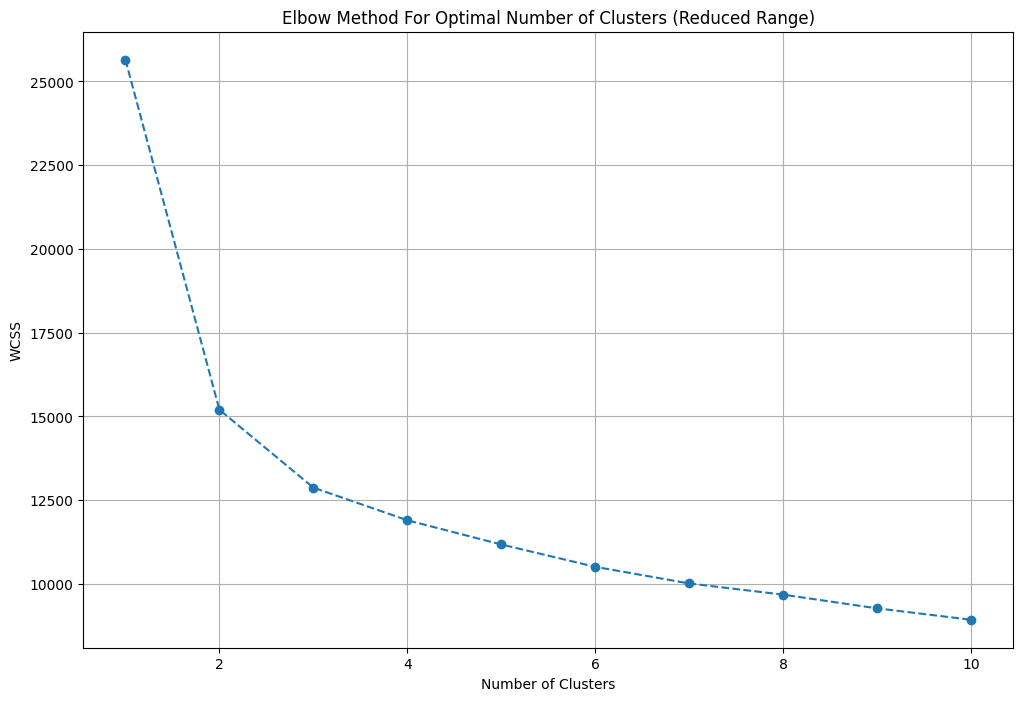

In [83]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [84]:
#we can see value=3 is where elbow shape is created
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
df = df.iloc[:,:-18]

In [86]:
df['furnishing_type'] = cluster_assignments

In [87]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 2 -> semifurnished
# 1 -> furnished

,furnishDetails,furnishing_type
97,"['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
1155,NaN,0
1164,NaN,0
1217,"['1 Fan', '1 Light', '1 AC', '1 TV', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
63,NaN,0


In [88]:
df['furnishing_type'].value_counts()

0    1248
2     116
1      61
Name: furnishing_type, dtype: int64

#features

In [89]:
df[['society','features']].sample(5)

,society,features
285,southwinds,"['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
233,gayatri apartment,"['Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated']"
568,on request,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)']"
597,on request,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)']"
978,on request,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [90]:
df['features'].isnull().sum()

183

In [91]:
#making a separate dataframe for the features

from sklearn.preprocessing import MultiLabelBinarizer
import ast


# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)



features_binary_df.sample(5)

,Airy Rooms,Bank Attached Property,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,High Ceiling Height,Intercom Facility,Internet/wi-fi connectivity,Lift(s),Low Density Society,Maintenance Staff,Natural Light,No open drainage around,Park,Piped-gas,Power Back-up,Private Garden / Terrace,Rain Water Harvesting,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Shopping Centre,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier,Water softening plant
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1169,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,1
999,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1
506,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1
381,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
#by search on google, we got various features which are there in any flat
#then using chatgpt we got weight for each feature
weights = {
    'Airy Rooms' : 6,
    'Bank Attached Property': 7,
    'Centrally Air Conditioned': 8,
    'Club house / Community Center': 8,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant' : 5,
    'Fitness Centre / GYM' : 7,
    'High Ceiling Height': 6,
    'Intercom Facility':8,
    'Internet/wi-fi connectivity': 8,
    'Lift(s)':7,
    'Low Density Society': 5,
    'Maintenance Staff':6,
    'Natural Light':8,
    'No open drainage around':7,
    'Park':8,
    'Piped-gas':8,
    'Power Back-up':8,
    'Private Garden / Terrace':6,
    'Rain Water Harvesting':7,
    'Recently Renovated':7,
    'Security / Fire Alarm':7,
    'Security Personnel':6,
    'Separate entry for servant room':6,
    'Shopping Centre':10,
    'Spacious Interiors':8,
    'Swimming Pool':8,
    'Visitor Parking':7,
    'Waste Disposal':7,
    'Water Storage':6,
    'Water purifier':7,
    'Water softening plant':9
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [93]:
df['luxury_score'] = luxury_score

In [94]:
df.head(2)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,simoco sanhita housing complex,0.27,bhangar,3857.0,Super Built up area 916(85.1 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),3.0,2,1,not available,2,NaN,New Property,NaN,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Waste Disposal', 'Club house / Community Center']",West,916.0,NaN,700.0,0,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Lift(s), Water Storage, No open drainage around, Bank Attached Property, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Shopping Centre, Waste Disposal, Club house / Community Center]",100.0
1,team taurus kabya,0.52,rajarhat,3729.0,Super Built up area 1287(119.57 sq.m.),3.0,2,2,not available,2,NaN,New Property,"['Dharmaraj Temple', 'Kali Mandir', 'Mukherjee Barir Durgadalan', 'Rekjoani Shitala Mandir', 'Kali Temple', 'Kali mandir', 'Manasha Mandir', 'Rajarhat Police Station Kali Temple', 'Radha Krishna Mandir', 'Kanjialpara Shani Mandir', 'Kali Mandir', 'Shreeramkhan Kali Bari Temple', 'Hanuman Mandir', 'Rajarhat Shitala Kali Temple', 'Krishna Mandir', 'Badamtala Shib Mandir', 'Dakbunglow Shani Kali Mandir', 'Masjid', 'Nathpara Shib Mandir', 'Nathpara Temple', 'Bhattacharya Orthopaedics and Related Research Centre Pvt Ltd', 'Netram Eye Hospital', 'Geetanjali IT Park', 'Airport Bus Stand lines VS1', 'Indian Oil', 'Stash Cafe', 'KATHI JUNCTION', 'Amity University', 'Aliah University']",NaN,"['Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Fitness Centre / GYM']",East,1287.0,NaN,NaN,0,0,0,0,0,0,"[Lift(s), Maintenance Staff, Swimming Pool, Park, Visitor Parking, Fitness Centre / GYM]",43.0


In [95]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [96]:
df.sample(2)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
958,on request,0.39,baguiati,3500.0,Super Built up area 1100(102.19 sq.m.),3.0,2,1,1,West,Relatively New,North,1100.0,NaN,NaN,0,0,0,0,0,0,39.0
1105,sherwood estate,0.47,narendrapur,5222.0,Super Built up area 900(83.61 sq.m.),2.0,2,1,4,North-West,Moderately Old,South,900.0,NaN,NaN,0,0,0,0,0,0,38.0


In [97]:
df.shape

(1425, 22)

In [98]:
df.to_csv('flats_cleaned_v3.csv',index=False)